In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
# First lets read in the data
df = pd.read_csv('driving_log.csv')

In [3]:
# And melt the data so that we have one image per row
center_df = df.loc[:,['center','steering','throttle','brake','speed']]
left_df = df.loc[:, ['left','steering','throttle','brake','speed']]
right_df = df.loc[:, ['right','steering','throttle','brake','speed']]

# Rename the columns
left_df.columns = ['verbose_image_name', 'steering', 'throttle','brake','speed']
right_df.columns = ['verbose_image_name', 'steering', 'throttle','brake','speed']
center_df.columns = ['verbose_image_name', 'steering', 'throttle','brake','speed']

# Combine all data
all_frames = [center_df, left_df, right_df]
df = pd.concat(all_frames)

In [4]:
# Get rid of the IMG/ at the start of the name
def get_image_name(image_name):
    return image_name.split('/')[1]

df['image_name'] = df['verbose_image_name'].apply(get_image_name)
del df['verbose_image_name']

In [5]:
# Get the image names from the folder and our data frame
IMAGE_FOLDER_NAME = "IMG"
image_names_from_df = df.values[:,4]

# Get the paths of the images 
image_paths = [IMAGE_FOLDER_NAME + "/" + image_name.split(".")[0] + ".jpg" for image_name in image_names_from_df]

['IMG/right_2016_12_01_13_43_58_665.jpg']


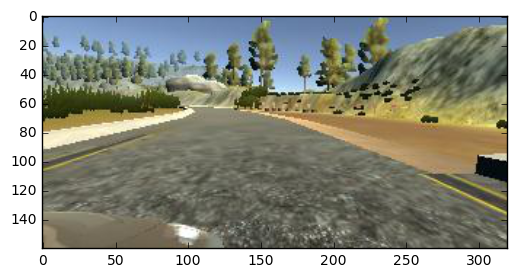

In [6]:
# Show a few sample images
image_path_selected = np.random.choice(image_paths, size = 1)
print(image_path_selected)

# First plot the image
fig = plt.figure()
subplots = fig.add_subplot(1,1,1)
image_data = mpimg.imread(image_path_selected[0])
plt.imshow(image_data)

In [7]:
# Used to resize the image
def resize_image(image_data, resized_width, resized_height):
    image = Image.fromarray(image_data)
    image = image.resize((resized_width, resized_height), Image.ANTIALIAS)
    return(np.asarray(image))
    

In [8]:
# Crop the image to get rid of the non-important features such as the car hood and the sky
def crop_image(image_data):
    image = Image.fromarray(image_data)
    # These values are so that the output image is 66 x 200
    cropped_image = np.asarray(image.crop((50,47,250,113)))
    return(cropped_image)

(66, 200, 3)


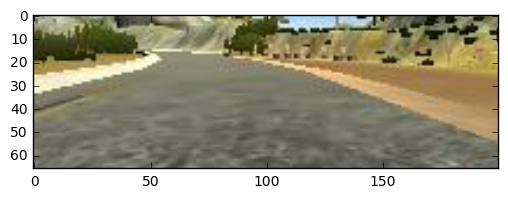

In [10]:
# Test to see if our crop_image function is working
cropped_image = crop_image(image_data)
plt.imshow(cropped_image)
print(cropped_image.shape)

In [21]:
# Crop the image to get rid of the non-important features such as the car hood and the sky
def crop_images_vec(images_data):
    cropped_images = []
    for image_data in images_data:
        cropped_images.append(crop_image(image_data))
    return(np.array(cropped_images))

In [20]:
# This
def resize_images_vec(images_data, resized_width, resized_height):
    resized_images = []
    count = 1
    for image_data in images_data:
        if count % 1000 == 0:
            print(count)
        resized_images.append(resize_image(image_data, resized_width, resized_height))
        count+=1
    return(np.array(resized_images))

(4, 160, 320, 3)
(4, 66, 200, 3)


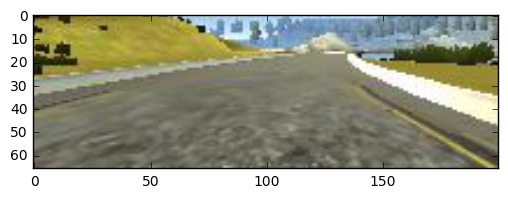

In [22]:
# Test to seee that it works images_data = []
image_path_selected = np.random.choice(image_paths, size = 4)
images_data = []
for image_path in image_path_selected:
    images_data.append(mpimg.imread(image_path))
    
images_data = np.array(images_data)
print(images_data.shape)
processed_images = crop_images_vec(images_data)
plt.imshow(processed_images[0])
print(processed_images.shape)

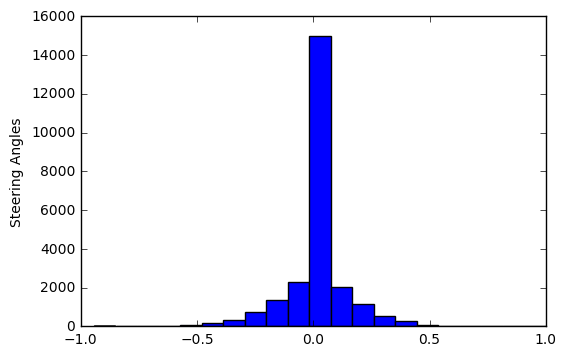

In [15]:
# Lets see a distribution of the steering angles
steering = df.steering
plt.hist(steering, bins = 21) # use 21 bins for each 0.1 interval
plt.ylabel("Steering Angles")

In [16]:
# We see that there is a lot of data concentrated around 0 meaning that 
# there is going to be a bias towards predicting 0s

# To fix this we will create new data from tjh



In [17]:
# Positive is turning right, negative is turning left

# For the left camera
# If the car is turning right (assuming there is an obstacle on the left) then we need to turn right more since it's closer
# If the car is turning left (assuming there is an obstacle on the right) then we need to turn left less since it's further away

# For the right camera
# If the car is turning right, then we need to turn right less since obstacle (which is on the left) is furthest from right camera
# If the car is turning left, then we need to turn left more since obstacle (which is on the right) is closest to right camera
# First separate data by cameras

# def left_camera_alter(steering, delta):
#     if steering > 0:
#         if steering + (steering * delta) >= 1:
#             return 1
#         else:
#             return steering + (steering * delta)
#     elif steering < 0:
#         if steering + (steering * delta) >= 0:
#             return 0
#         else:
#             return steering + (steering * delta)
#     else:
#         return steering

# def right_camera_alter(steering, delta):
#     if steering > 0:
#         if steering - (steering * delta) <= 0:
#             return 0
#         else:
#             return steering - (steering * delta)
#     elif steering < 0:
#         if steering - (steering * delta) <= -1:
#             return -1
#         else:
#             return steering - (steering * delta)
#     else:
#         return steering
   

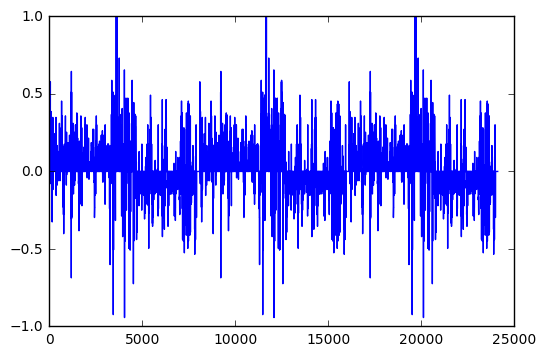

In [18]:
# See the distribution of steering angles
steering_angles = df.steering.values
plt.plot(steering_angles)

In [19]:
# Get the data
y = df.values[:,0]
X_raw = []
for image_path in image_paths:
    image_data = mpimg.imread(image_path)
    X_raw.append(image_data)

In [23]:
# Cast X into a numpy array
X = np.array(X_raw)

In [25]:
# Preprocess the image, and then resize it
IMG_WIDTH = 64
IMG_HEIGHT = 64
X = crop_images_vec(X)
# X = resize_images_vec(X, 64, 64)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000


In [26]:
# Now that we have our data lets split it into a test and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2)

In [27]:
print(X_train.shape, X_validation.shape, X_test.shape, y_train.shape, y_validation.shape, y_test.shape)

(15428, 66, 200, 3) (3858, 66, 200, 3) (4822, 66, 200, 3) (15428,) (3858,) (4822,)


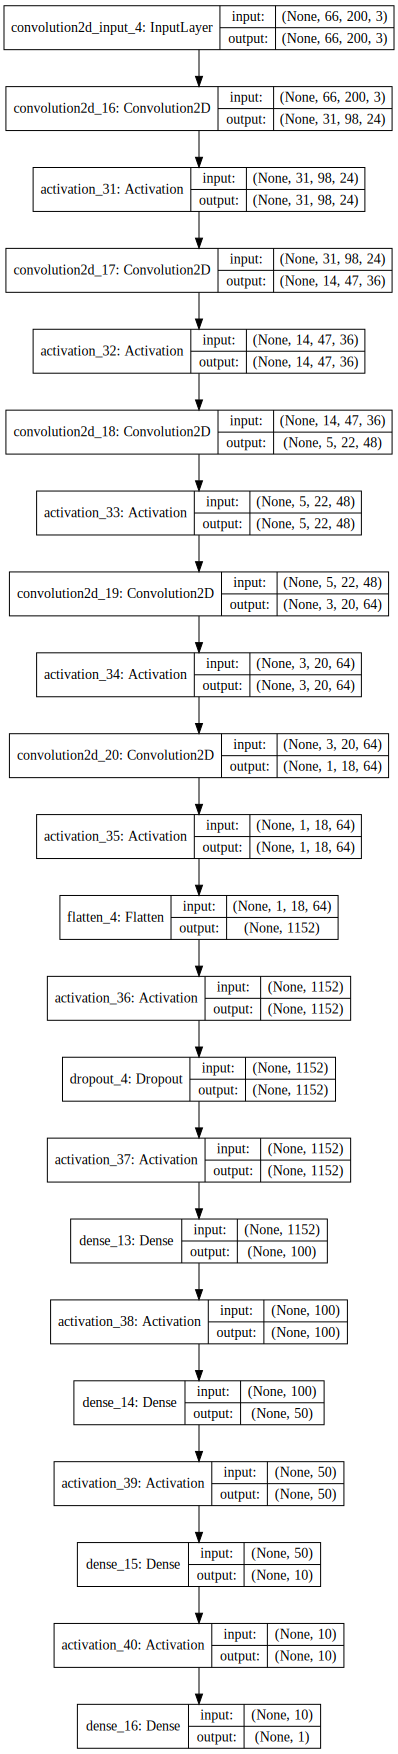

In [31]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution1D, Convolution2D, MaxPooling2D
from keras.activations import relu, softmax
from IPython.display import SVG, display
from keras.utils.visualize_util import model_to_dot
import keras

def get_nvidia_model():
    model = Sequential()

    model.add(Convolution2D(24, 5, 5, border_mode = "valid", subsample = (2,2), input_shape = (66,200,3)))
    model.add(Activation('relu'))

    model.add(Convolution2D(36, 5, 5, border_mode = "valid", subsample = (2,2)))
    model.add(Activation('relu'))

    model.add(Convolution2D(48, 5, 5, border_mode = "valid", subsample = (2,2)))
    model.add(Activation('relu'))

    model.add(Convolution2D(64, 3, 3, border_mode = "valid", subsample = (1,1)))
    model.add(Activation('relu'))

    model.add(Convolution2D(64, 3, 3, border_mode = "valid", subsample = (1,1)))
    model.add(Activation('relu'))

    model.add(Flatten())

    # Now use fully connected layers 
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('relu'))

    # Add the output layer
    model.add(Dense(1, init = 'normal'))

    # Define the optimizer
    adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0) 
    
    # Compile the model
    model.compile(loss = 'mean_squared_error', optimizer = adam)
    return(model)

nvidia_model = get_nvidia_model()
# Show the model
display(SVG(model_to_dot(nvidia_model, show_shapes=True).create(prog='dot', format='svg')))

In [16]:
# Normalizing the values so that they have a mean of 0 and standard deviation of 1
def normalize_image(images):
    
    
    # Get the YUV columns
    y_col = images[:,:,:,0]
    u_col = images[:,:,:,1]
    v_col = images[:,:,:,2]
    
    # Find the mean and sd
    y_mean = np.mean(y_col)
    u_mean = np.mean(u_col)
    v_mean = np.mean(v_col)
    y_sd = np.sqrt(np.var(y_col))
    u_sd = np.sqrt(np.var(u_col))
    v_sd = np.sqrt(np.var(v_col))
    
    #     print("y_mean, u_mean, v_mean before normalization")
    #     print(y_mean, u_mean, v_mean)
    
    #     print("y_sd, u_sd, v_sd before normalization")
    #     print(y_sd, u_sd, v_sd)
    
    images[:,:,:,0] = (images[:,:,:,0] - y_mean)/y_sd
    images[:,:,:,1] = (images[:,:,:,1] - u_mean)/u_sd
    images[:,:,:,2] = (images[:,:,:,2] - v_mean)/v_sd
    return(images)


In [17]:
# Mapping rgb to yuv color space
def rgb2yuv(images):
    rgb2yuv_matrix = np.array([[0.299, 0.587, 0.114], [-0.1473, -0.28886, 0.436],[0.615, -0.51499, 0.10001]])
    return(np.tensordot(images, rgb2yuv_matrix, axes=([3], [1])))

In [18]:
def preprocess_image(images):
    return normalize_image(rgb2yuv(images))

In [38]:
# Define the hyperparameteres for training
BATCH_SIZE = 64
NB_EPOCH = 6
from sklearn.utils import shuffle

# Define the generator
def my_generator(X, y, batch_size):
#     print(X_train.shape[0])
#     X_train, y_train = shuffle(X_train, y_train)
    start = 0
    end = start + batch_size
    n_samples = X.shape[0]
    
    while True: 
        X_batch = preprocess_image(X[start:end])
        y_batch = y[start:end]
        start = end
        end = end + batch_size
        if start >= n_samples:
            X, y = shuffle(X, y)
            start = 0
            end = start + batch_size
        yield X_batch, y_batch

In [39]:
# Train the model
model.fit_generator(my_generator(X_train, y_train, BATCH_SIZE), samples_per_epoch = X_train.shape[0], nb_epoch = NB_EPOCH, validation_data = (preprocess_image(X_validation), y_validation))

Epoch 1/6
15428/15428 [==============================] - 161s - loss: 0.0082 - val_loss: 0.0075

In [34]:
# Now evaluate on our test set 
loss = model.evaluate(preprocess_image(X_test), y_test)
print(loss)

4822/4822 [==============================] - 17s     

In [40]:
# Now save the model
from keras.models import load_model
model.save_weights("model.h5")

In [41]:
model_json = model.to_json()
with open('model.json', 'w') as outfile:
    outfile.write(model_json)

In [42]:
X_test.shape

(4822, 66, 200, 3)